In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *
%load_ext autoreload

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


/Users/miroslavbatchkarov/anaconda/envs/py3k/lib/python3.3/site-packages/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)

  different = bool(ours != theirs)



[268, 269, 270, 271, 272, 273, 274, 275, 276, 277]
Composer has 5000 values
Accuracy has 5000 values
Clusters has 5000 values
folds has 5000 values


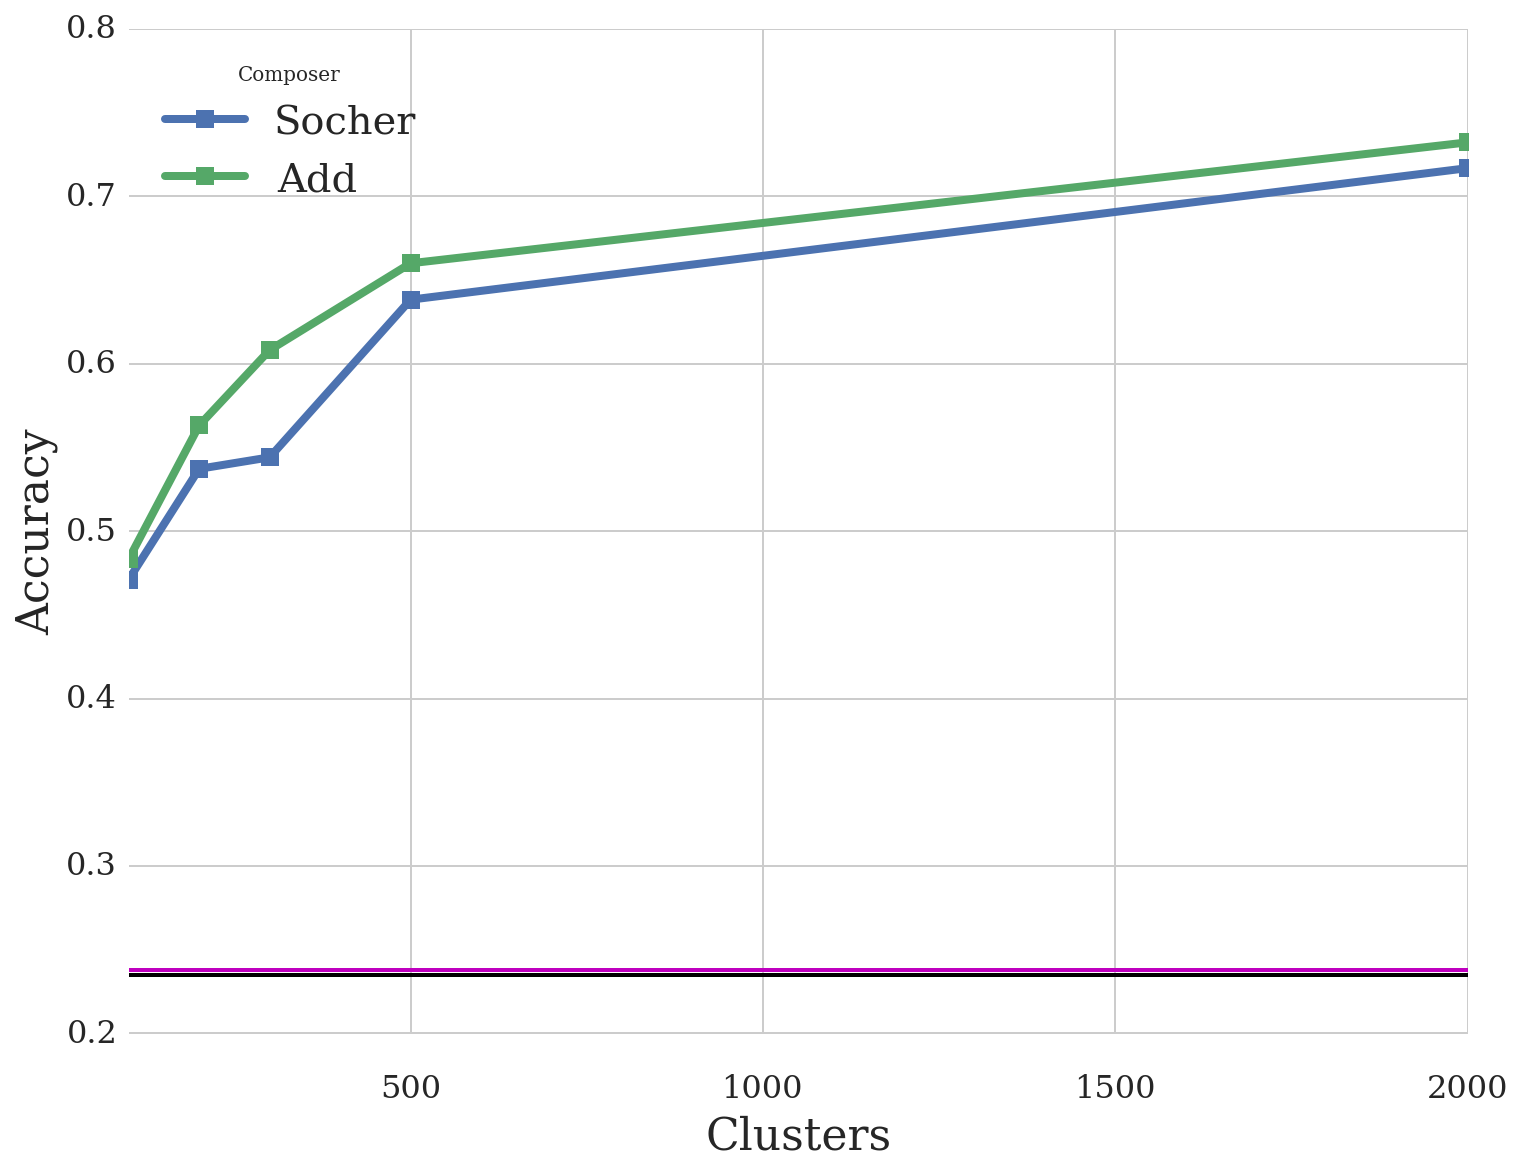

In [2]:
query_dict = {
             'clusters__vectors__algorithm__in': ['turian'],
             'clusters__vectors__composer__in': ['Add', 'Socher'],
             'clusters__vectors__unlabelled__in': ['turian'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}
# scores of the same vectors when used to lookup and replace neighbours instead of via clustering
other_dict = {
            'document_features_ev': 'AN+NN',
            'document_features_tr': 'J+N+AN+NN',
            'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
            'expansions__vectors__algorithm': 'turian',
            'expansions__vectors__composer__in': ['Add', 'Socher'],
            'expansions__vectors__dimensionality': 100,
            'expansions__vectors__rep': 0,
            'expansions__vectors__unlabelled': 'turian',
            'expansions__vectors__unlabelled_percentage': 100,
            'labelled': 'amazon_grouped-tagged'}

ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer'})
df = df.convert_objects(convert_numeric=True)
sns.tsplot(data=df, time='Clusters', condition='Composer', 
           value='Accuracy', unit='folds',
           marker='s', linewidth=4)

colors = 'mk'
for i, exp in enumerate(Experiment.objects.filter(**other_dict)):
    plt.axhline(Results.objects.get(id=exp.id, classifier=CLASSIFIER).accuracy_mean,
               label='Neigh: %s'%exp.expansions.vectors.composer, c=colors[i])
sns.despine(left=True)

plt.savefig('plot-clusters1.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297]
Composer has 10000 values
Accuracy has 10000 values
Clusters has 10000 values
Unlabelled has 10000 values
folds has 10000 values


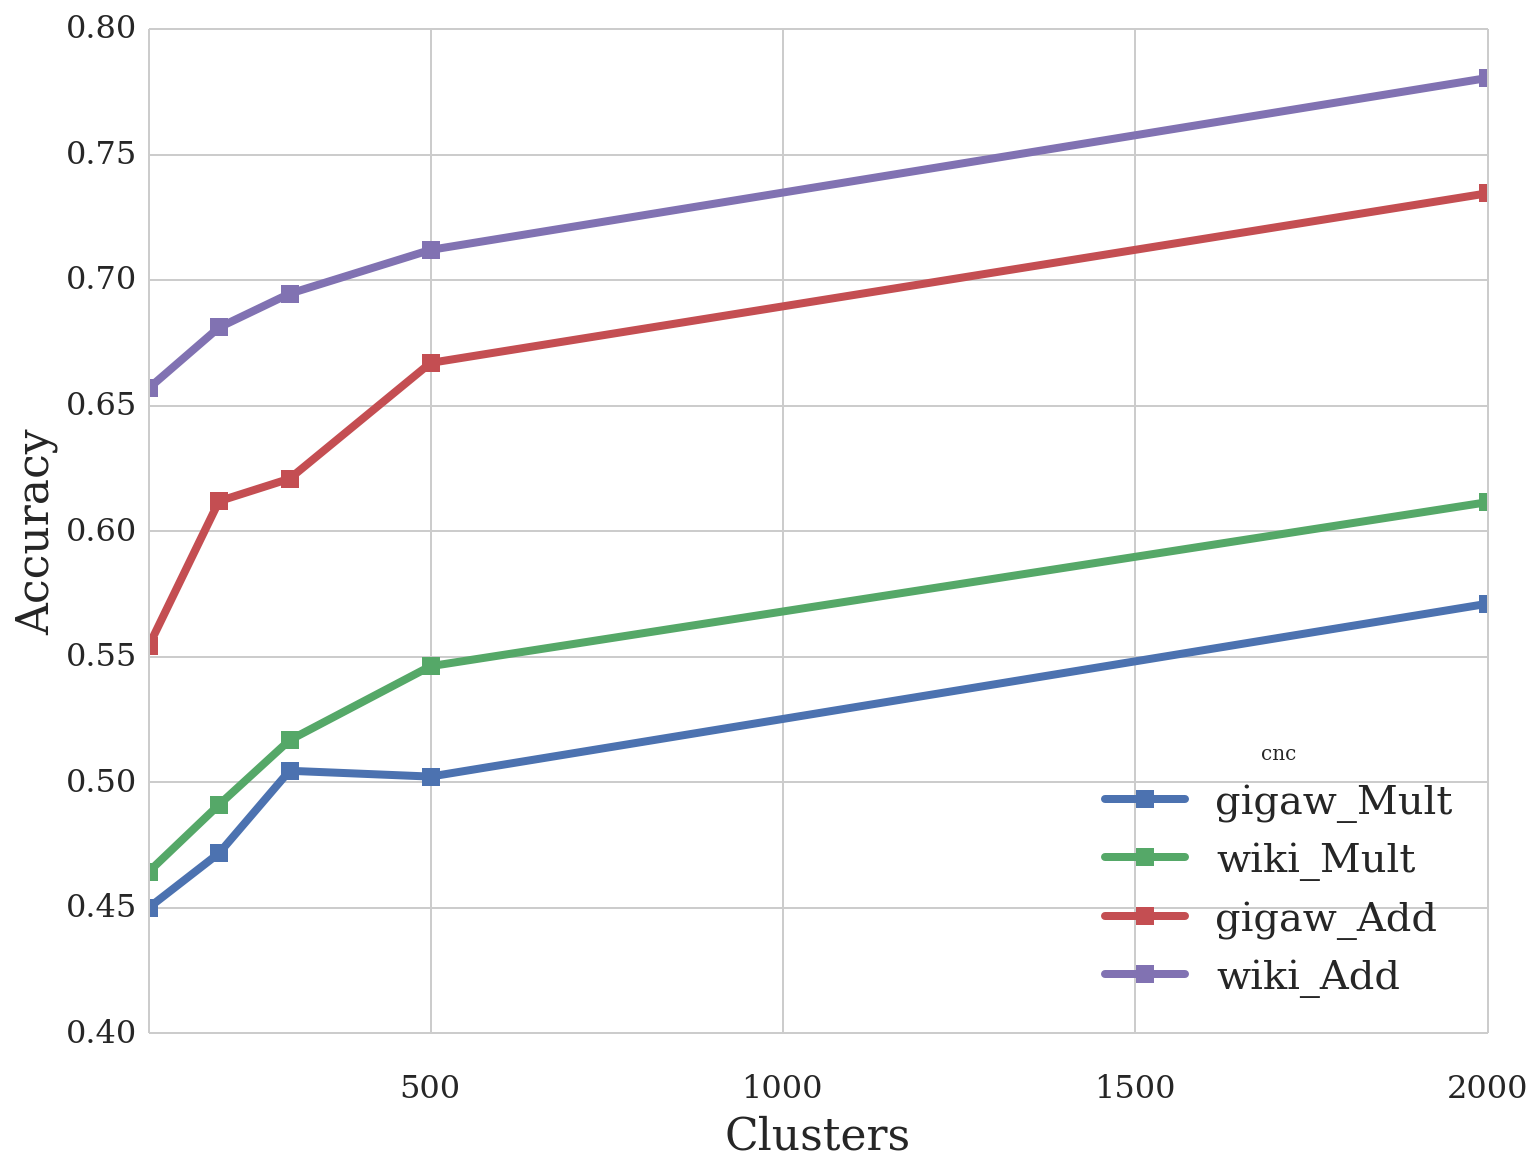

In [3]:
query_dict['clusters__vectors__algorithm__in'] = ['word2vec']
query_dict['clusters__vectors__composer__in'] = ['Add', 'Mult']
query_dict['clusters__vectors__unlabelled__in'] = ['gigaw', 'wiki']

other_dict['expansions__vectors__algorithm'] = 'word2vec'
other_dict['expansions__vectors__composer__in'] = ['Add', 'Mult']
other_dict['expansions__vectors__unlabelled__in'] = ['gigaw', 'wiki']

ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer',
                                  'Unlabelled':'clusters__vectors__unlabelled'
                                 })
df = df.convert_objects(convert_numeric=True)
df['cnc'] = df.Unlabelled + '_' + df.Composer
sns.tsplot(data=df, time='Clusters', condition='cnc', 
           value='Accuracy', unit='folds',
           marker='s', linewidth=4)

# colors = 'mkcy'
# for i, exp in enumerate(Experiment.objects.filter(**other_dict)):
#     plt.axhline(Results.objects.get(id=exp.id, classifier=CLASSIFIER).accuracy_mean,
#                label='Neigh: %s'%exp.expansions.vectors.composer, c=colors[i])
# sns.despine(left=True)
    
plt.savefig('plot-clusters2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[293, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323]
Calculating CI for exp 314
Calculating CI for exp 315
Calculating CI for exp 316
Calculating CI for exp 317
Calculating CI for exp 318
Calculating CI for exp 319
Calculating CI for exp 320
Calculating CI for exp 321
Calculating CI for exp 322
Calculating CI for exp 323
Accuracy has 5500 values
Percent has 5500 values
Labelled has 5500 values
folds has 5500 values


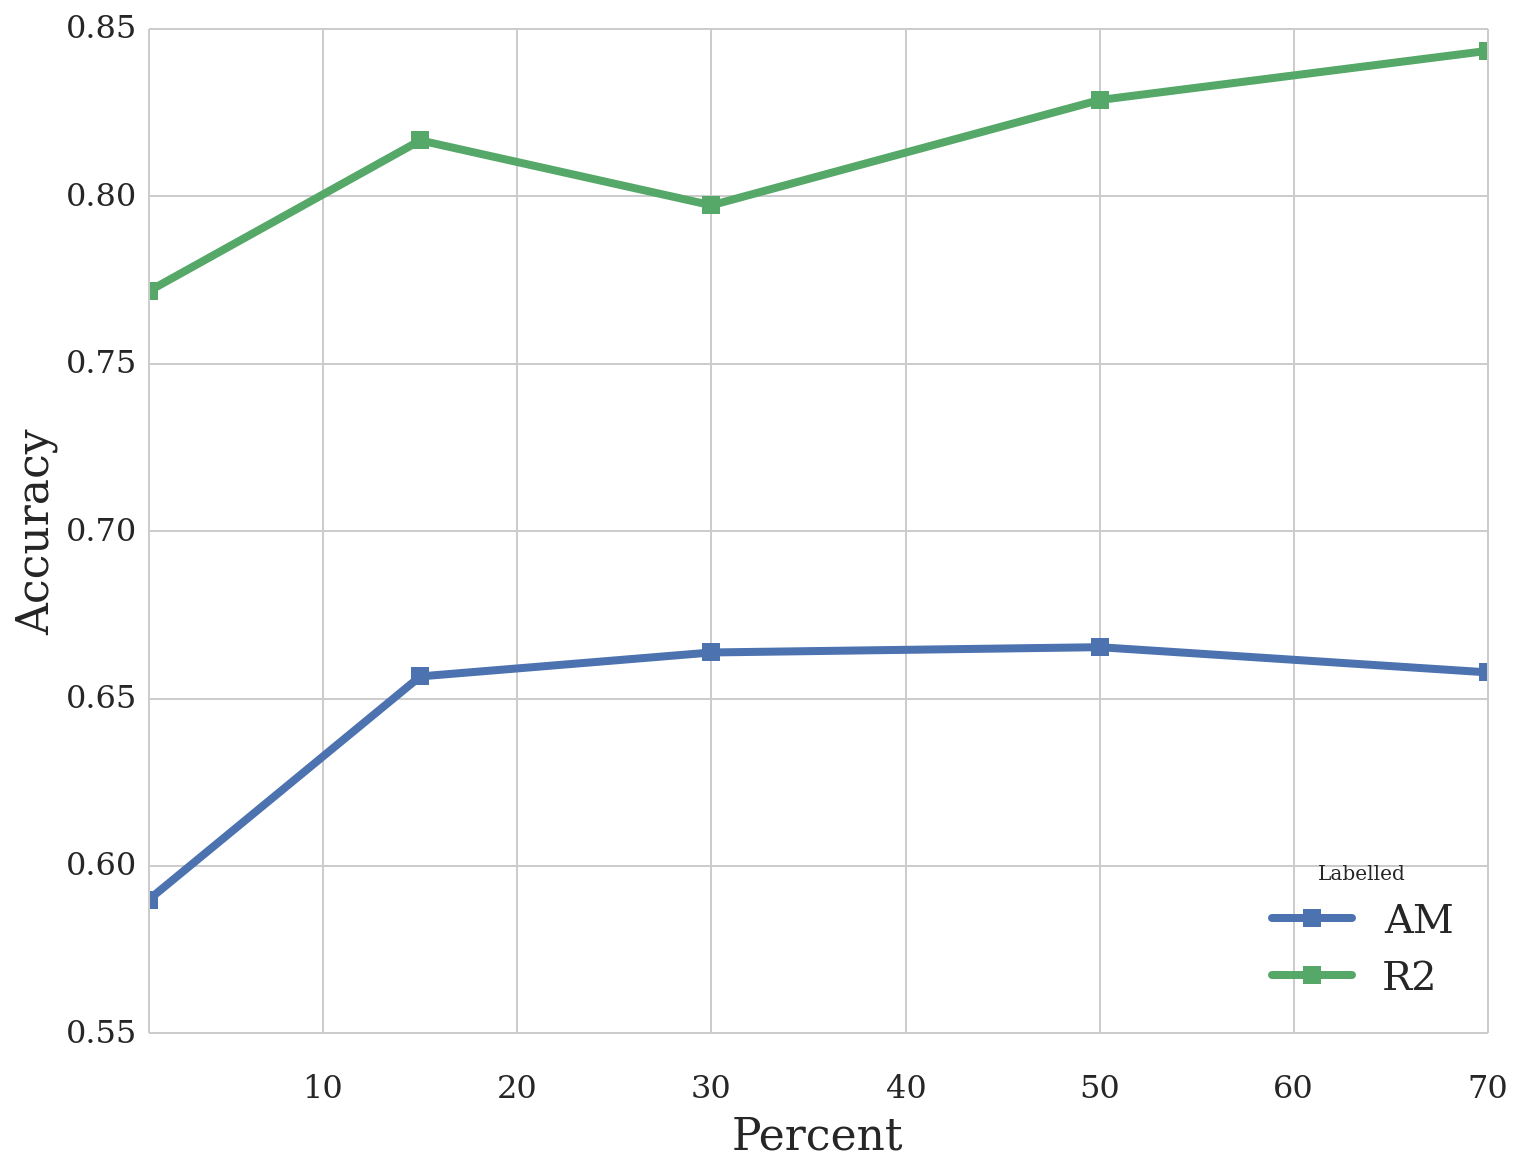

In [5]:
query_dict = {
'clusters__num_clusters': 100,
'clusters__vectors__algorithm': 'word2vec',
'clusters__vectors__composer': 'Add',
'clusters__vectors__dimensionality': 100,
'clusters__vectors__rep': 0,
'clusters__vectors__unlabelled': 'wiki',
# 'clusters__vectors__unlabelled_percentage': 70,
'document_features_ev': 'AN+NN',
'document_features_tr': 'J+N+AN+NN',
# 'labelled': 'amazon_grouped-tagged'
}
ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Labelled':'labelled', 
                                  'Percent':'clusters__vectors__unlabelled_percentage'})
df = df.convert_objects(convert_numeric=True)
sns.tsplot(data=df, time='Percent', condition='Labelled', 
           value='Accuracy', unit='folds',
           marker='s', linewidth=4)

In [6]:
get_ci(323)

(0.84349186991869918,
 0.81842140921409212,
 0.86518292682926834,
 array([ 0.81368564,  0.81707317,  0.81775068,  0.81910569,  0.82113821,
         0.82113821,  0.82113821,  0.82113821,  0.82181572,  0.82249322,
         0.82249322,  0.82249322,  0.82384824,  0.82452575,  0.82452575,
         0.82655827,  0.82723577,  0.82723577,  0.82723577,  0.82791328,
         0.82791328,  0.82791328,  0.82791328,  0.82791328,  0.82791328,
         0.82859079,  0.82859079,  0.82859079,  0.82926829,  0.82926829,
         0.82926829,  0.82926829,  0.8299458 ,  0.8299458 ,  0.8299458 ,
         0.83062331,  0.83062331,  0.83062331,  0.83062331,  0.83062331,
         0.83062331,  0.83062331,  0.83130081,  0.83130081,  0.83130081,
         0.83130081,  0.83130081,  0.83130081,  0.83130081,  0.83130081,
         0.83130081,  0.83130081,  0.83130081,  0.83130081,  0.83130081,
         0.83197832,  0.83197832,  0.83197832,  0.83197832,  0.83197832,
         0.83197832,  0.83265583,  0.83265583,  0.83265583